In [2]:
from vpython import *
import numpy as np
from matplotlib import pyplot as plt
import time
from queue import PriorityQueue

<IPython.core.display.Javascript object>

## Network of Logic Gates

<IPython.core.display.Javascript object>

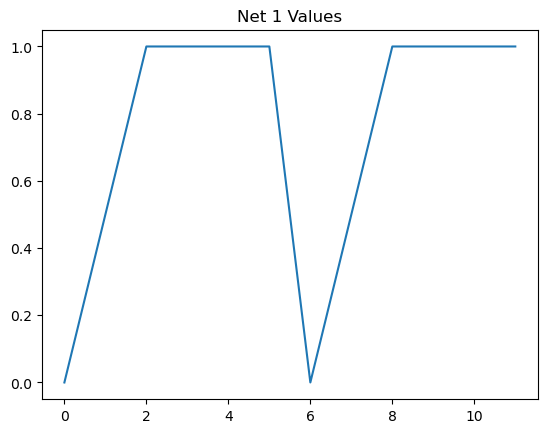

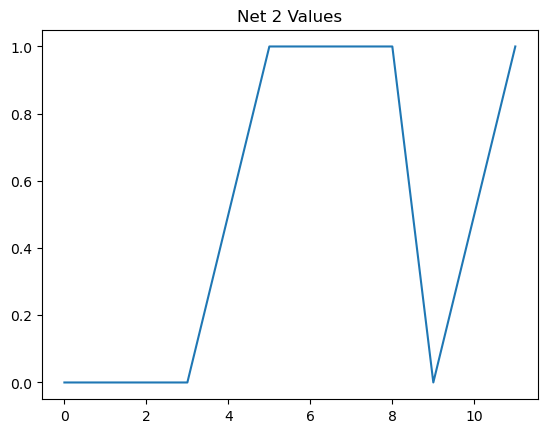

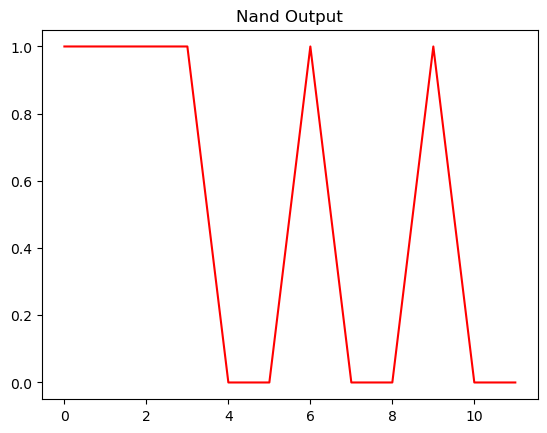

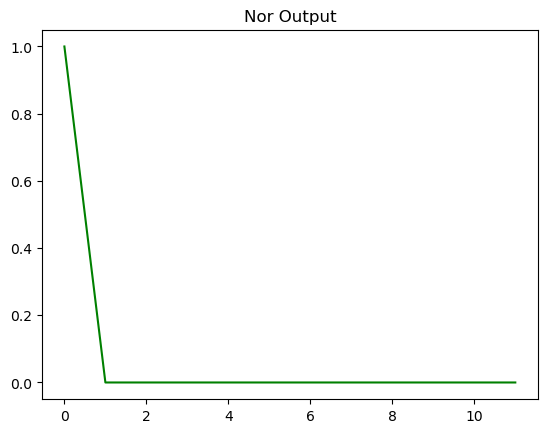

In [75]:
scene = canvas()
class Gate:
    def __init__(self,id_num=1,net_delay=.5,n=[],out=None,f=None):
        self.id_n = id_num 
        self.delay = net_delay
        self.inputs = nets
        self.output = out
        self.func = f
        self.nets = n
    def set_output(self):
        self.output = self.func(self.nets[0],self.nets[1])
class Net:
    def __init__(self,id_num=1,val=None,drv=None,rec=None):
        self.id_n = id_num
        self.value = val
        self.driver = drv
        self.reciever = rec
def nand(a,b):
    return int(not(a and b))
def nor(a,b):
    return int(not(a or b))

net_1 = Net(1,0)
net_2 = Net(2,0)
nets = [net_1,net_2]
values = [0,.5,1]

nand_gate = Gate(id_num=1,n=nets,f=nand)
nor_gate = Gate(id_num=2,n=nets,f=nor)

t = 0
deltat = 1
time = []
nand_values = []
nor_values = []
net1_values = []
net2_values = []
while t < 10:
    rate(100)
    for i in range(len(nets)):
        for j in range(len(values)):
            time.append(t)
            nets[i].value = values[j]
            net1_values.append(nets[0].value)
            net2_values.append(nets[1].value)
            nand_gate.output = nand_gate.func(nets[0].value,nets[1].value)
            nor_gate.output = nor_gate.func(nets[0].value,nets[1].value)
            nand_values.append(nand_gate.output)
            nor_values.append(nor_gate.output)
            t = t + deltat
plt.figure()
plt.title("Net 1 Values")
plt.plot(time,net1_values)
plt.figure()
plt.title("Net 2 Values")
plt.plot(time,net2_values)
plt.figure()
plt.title("Nand Output")
plt.plot(time,nand_values,color='r')
plt.figure()
plt.title("Nor Output")
plt.plot(time,nor_values,color='g')

I verified my results by comparing my simulated output to the expected output of a simple nand and nor gate using my knowledge of their functionality and their truth table values. 

## References

https://en.wikipedia.org/wiki/Netlist

## Event Queueing (NAND Combinational Circuit)

In [4]:
scene=canvas()
class Gate:
    def __init__(self,id_num=1,net_delay=.5,nets=[],out=0,f=None):
        self.id_n = id_num 
        self.delay = net_delay
        self.inputs = nets
        self.output = out
        self.func = f
    def update(self):
        input_values = [nets[i-1].value for i in self.inputs]
        output_value = int(self.func(*input_values))
        nets[self.output-1].value = output_value
    
    def propagate(self):
        event_time = t + self.delay
        event_value = int(nets[self.output-1].value)
        event = Event(self.output, event_value, event_time)
        event_queue.put(event)
class Net:
    def __init__(self,id_num=1,val=0,drv=0,rec=[]):
        self.id_n = id_num
        self.value = val
        self.driver = drv
        self.receivers = rec     
    def update(self):
        self.value = int(nets[self.driver-1].value)
    
    def propagate(self):
        for rec_id in self.receivers:
            rec_gate = gates[rec_id-1]
            event_time = t + rec_gate.delay
            event_value = int(self.value)
            event = Event(rec_id, event_value, event_time)
            event_queue.put(event)
class Event:
    def __init__(self,net_id=1,val=0,t=0):
        self.id_n = net_id
        self.value = val
        self.time = t
    def __lt__(self,other):
        return self.time < other.time
         
    
def nand(a,b):
    return not(a and b)
def nor(a,b):
    return not(a or b)

#Build Network
net_1 = Net(1)
net_2 = Net(2)
net_3 = Net(3)
net_4 = Net(4)
net_5 = Net(5)

nets = [net_1,net_2,net_3,net_4,net_5]

nand_gate1 = Gate(id_num=1,f=nand)
nand_gate1.inputs = [net_1.id_n,net_2.id_n]
nand_gate1.output = net_3.id_n
nand_gate2 = Gate(id_num=2,f=nand)
nand_gate2.inputs = [net_1.id_n,net_1.id_n]
nand_gate2.output = net_4.id_n
nand_gate3 = Gate(id_num=3,f=nand)
nand_gate3.inputs = [net_3.id_n,net_4.id_n]
nand_gate3.output = net_5.id_n

gates = [nand_gate1, nand_gate2, nand_gate3]

net_1.receivers = [nand_gate1.id_n,nand_gate2.id_n,nand_gate2.id_n]
net_2.receivers = [nand_gate1.id_n]
net_3.receivers = [nand_gate3.id_n]
net_4.receivers = [nand_gate3.id_n]

net_3.driver = nand_gate1.id_n
net_4.driver = nand_gate2.id_n
net_5.driver = nand_gate3.id_n

#Build Input Queue
event_queue = PriorityQueue()
#00
event_queue.put(Event(net_1.id_n,0,t=0))
event_queue.put(Event(net_2.id_n,0,t=0))
#01
event_queue.put(Event(net_1.id_n,0,t=5))
event_queue.put(Event(net_2.id_n,1,t=5))
#10
event_queue.put(Event(net_1.id_n,1,t=10))
event_queue.put(Event(net_2.id_n,0,t=10))
#11
event_queue.put(Event(net_1.id_n,1,t=15))
event_queue.put(Event(net_2.id_n,1,t=15))

t = 0
time = []
deltat = .1
graph1 = graph(title='Net 1')
graph_net_1 = gcurve(color=color.red)
graph2 = graph(title='Net 2')
graph_net_2 = gcurve(color=color.blue)
graph3 = graph(title='Net 3')
graph_net_3 = gcurve(color=color.green)
graph4 = graph(title='Net 4')
graph_net_4 = gcurve(color=color.orange)
graph5 = graph(title='Net 5')
graph_net_5 = gcurve(color=color.magenta)
while not event_queue.empty():
    rate(100)
    current_event = event_queue.get()
#     print("current_event: " + str(current_event.id_n) + " , " + str(current_event.value) + " , " + str(current_event.time))
    time.append(t)
    t = current_event.time
    net_id = current_event.id_n
    nets[net_id-1].value = current_event.value
#     nets[net_id-1].update()
    for rec_id in nets[net_id-1].receivers:
        gates[rec_id-1].update()
        gates[rec_id-1].propagate()
#     print("time: " + str(t))
#     print("net_1.value: " + str(net_1.value))
    graph_net_1.plot(t, net_1.value,style='dots')
    graph_net_2.plot(t, net_2.value,style='dots')
    graph_net_3.plot(t, net_3.value,style='dots')
    graph_net_4.plot(t, net_4.value,style='dots')
    graph_net_5.plot(t, net_5.value,style='dots')

<IPython.core.display.Javascript object>

## Event Queueing (NOR Combinational Circuit)

In [95]:
scene=canvas()
class Gate:
    def __init__(self,id_num=1,net_delay=.5,nets=[],out=0,f=None):
        self.id_n = id_num 
        self.delay = net_delay
        self.inputs = nets
        self.output = out
        self.func = f
    def update(self):
        input_values = [nets[i-1].value for i in self.inputs]
        output_value = int(self.func(*input_values))
        nets[self.output-1].value = output_value
    
    def propagate(self):
        event_time = t + self.delay
        event_value = int(nets[self.output-1].value)
        event = Event(self.output, event_value, event_time)
        event_queue.put(event)
class Net:
    def __init__(self,id_num=1,val=0,drv=0,rec=[]):
        self.id_n = id_num
        self.value = val
        self.driver = drv
        self.receivers = rec     
    def update(self):
        self.value = int(nets[self.driver-1].value)
    
    def propagate(self):
        for rec_id in self.receivers:
            rec_gate = gates[rec_id-1]
            event_time = t + rec_gate.delay
            event_value = int(self.value)
            event = Event(rec_id, event_value, event_time)
            event_queue.put(event)
class Event:
    def __init__(self,net_id=1,val=0,t=0):
        self.id_n = net_id
        self.value = val
        self.time = t
    def __lt__(self,other):
        return self.time < other.time
         
    
def nand(a,b):
    return not(a and b)
def nor(a,b):
    return not(a or b)

#Build Network
net_1 = Net(1)
net_2 = Net(2)
net_3 = Net(3)
net_4 = Net(4)
net_5 = Net(5)

nets = [net_1,net_2,net_3,net_4,net_5]

nand_gate1 = Gate(id_num=1,f=nor)
nand_gate1.inputs = [net_1.id_n,net_2.id_n]
nand_gate1.output = net_3.id_n
nand_gate2 = Gate(id_num=2,f=nor)
nand_gate2.inputs = [net_1.id_n,net_1.id_n]
nand_gate2.output = net_4.id_n
nand_gate3 = Gate(id_num=3,f=nor)
nand_gate3.inputs = [net_3.id_n,net_4.id_n]
nand_gate3.output = net_5.id_n

gates = [nand_gate1, nand_gate2, nand_gate3]

net_1.receivers = [nand_gate1.id_n,nand_gate2.id_n,nand_gate2.id_n]
net_2.receivers = [nand_gate1.id_n]
net_3.receivers = [nand_gate3.id_n]
net_4.receivers = [nand_gate3.id_n]

net_3.driver = nand_gate1.id_n
net_4.driver = nand_gate2.id_n
net_5.driver = nand_gate3.id_n

#Build Input Queue
event_queue = PriorityQueue()
#00
event_queue.put(Event(net_1.id_n,0,t=0))
event_queue.put(Event(net_2.id_n,0,t=0))
#01
event_queue.put(Event(net_1.id_n,0,t=5))
event_queue.put(Event(net_2.id_n,1,t=5))
#10
event_queue.put(Event(net_1.id_n,1,t=10))
event_queue.put(Event(net_2.id_n,0,t=10))
#11
event_queue.put(Event(net_1.id_n,1,t=15))
event_queue.put(Event(net_2.id_n,1,t=15))

t = 0
deltat = .1
graph1 = graph(title='Net 1')
graph_net_1 = gcurve(color=color.red)
graph2 = graph(title='Net 2')
graph_net_2 = gcurve(color=color.blue)
graph3 = graph(title='Net 3')
graph_net_3 = gcurve(color=color.green)
graph4 = graph(title='Net 4')
graph_net_4 = gcurve(color=color.orange)
graph5 = graph(title='Net 5')
graph_net_5 = gcurve(color=color.magenta)
while not event_queue.empty():
    rate(100)
    current_event = event_queue.get()
#     print("current_event: " + str(current_event.id_n) + " , " + str(current_event.value) + " , " + str(current_event.time))
    time.append(t)
    t = current_event.time
    net_id = current_event.id_n
    nets[net_id-1].value = current_event.value
#     nets[net_id-1].update()
    for rec_id in nets[net_id-1].receivers:
        gates[rec_id-1].update()
        gates[rec_id-1].propagate()
#     print("time: " + str(t))
#     print("net_1.value: " + str(net_1.value))
    graph_net_1.plot(t, net_1.value,style='dots')
    graph_net_2.plot(t, net_2.value,style='dots')
    graph_net_3.plot(t, net_3.value,style='dots')
    graph_net_4.plot(t, net_4.value,style='dots')
    graph_net_5.plot(t, net_5.value,style='dots')

<IPython.core.display.Javascript object>

I verified the behavior of my combinational circuit by drawing my NAND circuit and creating a truth table with the input nets(Net 1 and Net 2) and using those to determine the outputs of each of the nand gates as I propogated through the entire circuit. I then matched those truth table values to the graphs I plotted using gcurve. 

## References

https://www.tutorialspoint.com/How-to-overload-Python-comparison-operators

## NAND-gate D Latch

In [94]:
scene=canvas()
class Gate:
    def __init__(self,id_num=1,net_delay=.5,nets=[],out=0,f=None):
        self.id_n = id_num 
        self.delay = net_delay
        self.inputs = nets
        self.output = out
        self.func = f
    def update(self):
        input_values = [nets[i-1].value for i in self.inputs]
        output_value = int(self.func(*input_values))
        nets[self.output-1].value = output_value
    
    def propagate(self):
        event_time = t + self.delay
        event_value = int(nets[self.output-1].value)
        event = Event(self.output, event_value, event_time)
        event_queue.put(event)
class Net:
    def __init__(self,id_num=1,val=0,drv=0,rec=[]):
        self.id_n = id_num
        self.value = val
        self.driver = drv
        self.receivers = rec     
    def update(self):
        self.value = int(nets[self.driver-1].value)
    
    def propagate(self):
        for rec_id in self.receivers:
            rec_gate = gates[rec_id-1]
            event_time = t + rec_gate.delay
            event_value = int(self.value)
            event = Event(rec_id, event_value, event_time)
            event_queue.put(event)
class Event:
    def __init__(self,net_id=1,val=0,t=0):
        self.id_n = net_id
        self.value = val
        self.time = t
    def __lt__(self,other):
        return self.time < other.time

    
def nand(a,b):
    return not(a and b)
def nor(a,b):
    return not(a or b)

#Build Network
net_1 = Net(1)
net_2 = Net(2)
net_3 = Net(3)
net_4 = Net(4)
net_5 = Net(5)
net_6 = Net(6)

nets = [net_1,net_2,net_3,net_4,net_5,net_6]

nand_gate1 = Gate(id_num=1,f=nand)
nand_gate1.inputs = [net_1.id_n,net_2.id_n]
nand_gate1.output = net_3.id_n
nand_gate2 = Gate(id_num=2,f=nand)
nand_gate2.inputs = [net_3.id_n,net_2.id_n]
nand_gate2.output = net_4.id_n
nand_gate3 = Gate(id_num=3,f=nand)
nand_gate3.inputs = [net_3.id_n,net_6.id_n]
nand_gate3.output = net_5.id_n
nand_gate4 = Gate(id_num=4,f=nand)
nand_gate4.inputs = [net_5.id_n,net_4.id_n]
nand_gate4.output = net_6.id_n

gates = [nand_gate1,nand_gate2,nand_gate3,nand_gate4]

net_1.receivers = [nand_gate1.id_n]
net_2.receivers = [nand_gate1.id_n,nand_gate2.id_n]
net_3.receivers = [nand_gate2.id_n,nand_gate3.id_n]
net_4.receivers = [nand_gate4.id_n]
net_5.receivers = [nand_gate4.id_n]
net_6.receivers = [nand_gate3.id_n]

net_3.driver = nand_gate1.id_n
net_4.driver = nand_gate2.id_n
net_5.driver = nand_gate3.id_n
net_6.driver = nand_gate4.id_n

#Build Input Queue
event_queue = PriorityQueue()
#00
event_queue.put(Event(net_1.id_n,0,t=0))
event_queue.put(Event(net_2.id_n,0,t=0))
#01
event_queue.put(Event(net_1.id_n,0,t=5))
event_queue.put(Event(net_2.id_n,1,t=5))
#10
event_queue.put(Event(net_1.id_n,1,t=10))
event_queue.put(Event(net_2.id_n,0,t=10))
#11
event_queue.put(Event(net_1.id_n,1,t=15))
event_queue.put(Event(net_2.id_n,1,t=15))

t = 0
deltat = .1
graph1 = graph(title='Net 1')
graph_net_1 = gcurve(color=color.red)
graph1 = graph(title='Net 2')
graph_net_2 = gcurve(color=color.blue)
graph1 = graph(title='Net 3')
graph_net_3 = gcurve(color=color.green)
graph1 = graph(title='Net 4')
graph_net_4 = gcurve(color=color.orange)
graph1 = graph(title='Net 5')
graph_net_5 = gcurve(color=color.magenta)
while not event_queue.empty() and t < 16:
    rate(100)
    current_event = event_queue.get()
#     print("current_event: " + str(current_event.id_n) + " , " + str(current_event.value) + " , " + str(current_event.time))
    time.append(t)
    t = current_event.time
    net_id = current_event.id_n
    nets[net_id-1].value = current_event.value
#     nets[net_id-1].update()
    for rec_id in nets[net_id-1].receivers:
        gates[rec_id-1].update()
        gates[rec_id-1].propagate()
#     print("time: " + str(t))
#     print("net_1.value: " + str(net_1.value))
    graph_net_1.plot(t, net_1.value,style='dots')
    graph_net_2.plot(t, net_2.value,style='dots')
    graph_net_3.plot(t, net_3.value,style='dots')
    graph_net_4.plot(t, net_4.value,style='dots')
    graph_net_5.plot(t, net_5.value,style='dots')

<IPython.core.display.Javascript object>

This sequential circuit behaves exactly as I would expect a D latch to operate since Q(Net 5) = D(Net 1) when Clk(Net 2) is enabled. 

## 1F

I got exactly what I was expecting from both combinational and sequential circuit simulation. As you can see from my simulations combinational circuits only rely on the present input whereas sequential circtuis relied on the current input as well as the previous output.

## References

https://tams-www.informatik.uni-hamburg.de/applets/hades/webdemos/16-flipflops/20-dlatch/dlatch.html#:~:text=The%20D%2Dtype%20latch%20uses,of%20the%20front%20NAND%20gates.